<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Neural_networks_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

%matplotlib inline

In [2]:
# Load the hand-written digits dataset
digits = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/Datasets/data/ml-ex4/ex4data1.mat')

In [3]:
# Digit image data (5000 images with 400 features/pixels)
X = digits['X']

# Digit classes (1-10) where digit 0 is assigned class 10
y = digits['y'].ravel()

In [4]:
# Create a feed-forward neural network with a single hidden layer 
# with 25 logistic units. Input layer size is derived from number
# of features in X. Output layer size is derived from number of 
# classes in y.
clf = MLPClassifier((25,), activation='logistic', solver='lbfgs')
clf.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [5]:
# Classification accuracy on training set
clf.score(X, y)

1.0

In [6]:
# For cross validation, use two stratified randomized folds 
# where the test set size = 0.1 * dataset size. Statified 
# means that the folds are made by preserving the percentage 
# of samples for each class.
cv = StratifiedShuffleSplit(2, test_size=0.1, random_state=0)

# Run a grid search to find the best value values for regularization 
# parameter alpha using the cross validator (cv) defined above.
gs = GridSearchCV(clf, param_grid={'alpha':[1e-2, 1e-1, 1e0, 1e1]}, cv=cv)
gs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.1,
            train_size=None),
             error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(25,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
              

In [7]:
# Show the cross validation results in a pandas data frame
# - column mean_train_score: mean classification accuracy on training set
# - column mean_test_score: mean classification accuracy on test set
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,3.749802,0.153041,0.005656,0.002378,0.01,{'alpha': 0.01},0.918,0.924,0.921,0.003,4
1,5.980486,0.522594,0.004118,0.000844,0.1,{'alpha': 0.1},0.938,0.944,0.941,0.003,2
2,9.375058,0.119454,0.003628,0.000935,1,{'alpha': 1.0},0.936,0.948,0.942,0.006,1
3,9.700944,0.102357,0.003332,0.000667,10,{'alpha': 10.0},0.918,0.930,0.924,0.006,3


In [8]:
# Best classifier is the neural network with alpha=1.0
clf_best = gs.best_estimator_
clf_best

MLPClassifier(activation='logistic', alpha=1.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [9]:
# Classification accuracy on training set
clf_best.score(X, y)

0.9978

In [10]:
# Obtain weight matrix between input and hidden layer
# (input layer size = 400, hidden layer size = 25)
Theta1 = clf_best.coefs_[0].T
Theta1.shape

(25, 400)

<Figure size 432x288 with 0 Axes>

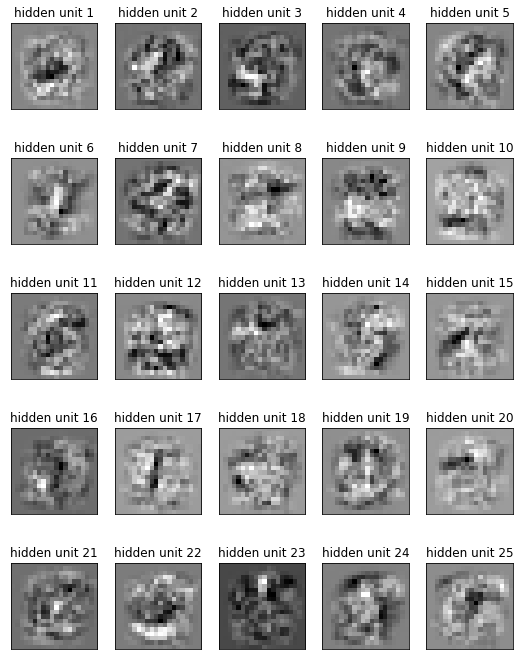

In [11]:
# Visualize input weights into hidden units (400 per hidden unit)
n_rows = 5
n_cols = 5

plt.subplots_adjust(top=.9, hspace=.4)
plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))

for i, row in enumerate(Theta1):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(row.reshape((20,20), order='F'), cmap=plt.cm.gray)
    plt.title(f'hidden unit {i + 1}')
    plt.xticks(())
    plt.yticks(())